# HW03  <font color=red>(제출기한-5월12일 자정)</font>
- <font color=red> 지각제출 : 0점 </font>
---
Datascience 이해도 평가를 위한 문제입니다. 


> 작성방법 

- 반드시 수업시간 배운 내용만을 사용하여 코드를 작성합니다. 
- 답안은 한 코드셀 내에 작성하며 여러줄로 작성해도 무방합니다.
- 출력결과가 미리 제시된 셀(<font color=red>'수정하지 마시오'</font>라고 표시된 셀)을 참고하여 코드를 작성하시오. 
- <font color=red>'수정하지 마시오'</font>라고 적힌 코드 셀은 절대로 지우면 안 됩니다.
- <font color=red> 불필요한 출력을 하는 코드</font>를 작성하면 0점 처리됩니다.
- Table에 관한 문제는 특별한 언급이 없을 경우 <font color=red> row와 column 순서가 출력 결과 예시와 동일</font>하게 합니다. 

> 제출방법

- ULMS HW3 제출란에 <font color=red>'HW03-학번.ipynb'</font>(본인학번)을 기한내 업로드합니다.
- <font color=red> 제출형식 오류 : 0점 <font>


In [ ]:
### 지우지 마시오.
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
fpath='https://raw.githubusercontent.com/data-8/textbook/878363106db4313de925a709b1617d6f328c56a1/assets/data/'

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


### 수업시간에 사용하였던 다음 NBA 연봉 데이터를 이용합니다.

In [ ]:
### 지우지 마시오.
nba = Table.read_table(fpath+'nba_salaries.csv').relabeled("'15-'16 SALARY", 'SALARY').sort(0)
nba

PLAYER,POSITION,TEAM,SALARY
Aaron Brooks,PG,Chicago Bulls,2.25
Aaron Gordon,PF,Orlando Magic,4.17168
Aaron Harrison,SG,Charlotte Hornets,0.525093
Adreian Payne,PF,Minnesota Timberwolves,1.93884
Al Horford,C,Atlanta Hawks,12
Al Jefferson,C,Charlotte Hornets,13.5
Al-Farouq Aminu,SF,Portland Trail Blazers,8.04289
Alan Anderson,SG,Washington Wizards,4
Alec Burks,SG,Utah Jazz,9.46348
Alex Len,C,Phoenix Suns,3.80712


### 문제1
TEAM이 'Chicago Bulls'이면서 연봉이 가장 높은 TOP-7 선수 정보를 *CBtop7* 이름의 Table 변수에 저장하시오. 

In [ ]:
### 답안을 작성하시오.
CBtop7=nba.where('TEAM', 'Chicago Bulls').sort('SALARY',descending=True).take(np.arange(7))

In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
CBtop7 

PLAYER,POSITION,TEAM,SALARY
Derrick Rose,PG,Chicago Bulls,20.0931
Jimmy Butler,SG,Chicago Bulls,16.4075
Joakim Noah,C,Chicago Bulls,13.4
Pau Gasol,C,Chicago Bulls,7.44876
Nikola Mirotic,PF,Chicago Bulls,5.54373
Mike Dunleavy,SG,Chicago Bulls,4.5
Kirk Hinrich,SG,Chicago Bulls,2.85494


### 문제2
TEAM이 'Chicago Bulls'인 선수들 중 SALARY의 최대값과 최소값을 구하여 각각 *CBmax*, *CBmin* 변수에 저장하시오. 

In [ ]:
### 답안을 작성하시오.
CB=nba.where('TEAM', 'Chicago Bulls').sort('SALARY')['SALARY']
CBmax, CBmin=CB[-1], CB[0]

In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
CBmax, CBmin

(20.093064, 1.015421)

### 문제3
각 TEAM별로 SALARY의 최대값과 최소값을 구해 `Difference` column으로 저장된 *team_diff* Table 변수에 저장하시오. 
- Team 이름순으로 정렬하여 저장하시오.

In [ ]:
### 답안을 작성하시오.
team_diff=nba.group('TEAM', lambda x:x.max()-x.min()).select('TEAM', 'SALARY').sort('TEAM').relabeled('SALARY', 'Difference')

In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
team_diff

TEAM,Difference
Atlanta Hawks,18.1466
Boston Celtics,6.5817
Brooklyn Nets,24.0498
Charlotte Hornets,12.9749
Chicago Bulls,19.0776
Cleveland Cavaliers,21.8232
Dallas Mavericks,14.5123
Denver Nuggets,13.9006
Detroit Pistons,13.313
Golden State Warriors,15.2112


### 문제4
전체 선수들 중 연봉이 가장 높거나 가장 낮은 N명 중 POSITION별 평균 연봉을 구해 Table을 리턴하는 ``position_salary``함수를 완성하시오.
- 전달되는 N 값이 양수인 경우 전체 선수들 중 연봉이 가장 높은 N명에 대해 POSITION별 평균 연봉을 구해 처리한다.
- 전달되는 N 값이 음수인 경우 전체 선수들 중 연봉이 가장 낮은 N명에 대해 POSITION별 평균 연봉을 구해 처리한다.
- N=0인 경우는 작성하지 않아도 된다.


In [ ]:
### 답안을 작성하시오.
def position_salary(n):
    if n>0: return nba.sort('SALARY', descending=True).take(np.arange(n)).group('POSITION', np.mean).select(0,3)
    elif n<0: return nba.sort('SALARY').take(np.arange(n*-1)).group('POSITION', np.mean).select(0,3)

In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
position_salary(-200)

POSITION,SALARY mean
C,1.65305
PF,1.47433
PG,1.46698
SF,1.39134
SG,1.12745


### 문제5
위 ``position_salary``함수를 이용하여 N=100 (상위100명), N=-100 (하위 100명)일때의 결과들을 각각 Table 변수 top100, bot100에 저장하시오. 

In [ ]:
### 답안을 작성하시오.
top100, bot100=position_salary(100), position_salary(-100)

In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
top100

POSITION,SALARY mean
C,12.8281
PF,12.7646
PG,12.7541
SF,14.9192
SG,11.6078


### 문제6
위에서 구한 ``top100``, ``bot100`` 두 Table을 합쳐서 Table 변수 ``topbot``을 생성하시오. 
- 생성되는 ``topbot`` Table의 column 이름은 ``TOP100``, ``BOT100``이 되도록 수정한다. 


In [ ]:
### 답안을 작성하시오.
topbot=top100.join('POSITION', bot100.relabeled(1, 'BOT100')).relabeled(1, 'TOP100')

In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
topbot

POSITION,TOP100,BOT100
C,12.8281,0.932978
PF,12.7646,0.787511
PG,12.7541,0.669757
SF,14.9192,0.911905
SG,11.6078,0.735712


### 문제7
top100과 bot100의 POSITION별 상대적 SALARY비중을 비교하기 위하여 top100과 bot100 column 각각에 대하여 백분율한 결과를 `topbot` Table에 추가하시오. 
- 추가되는 column의 이름은 각각 `TOP100(%)`, `BOT100(%)`이어야 한다.
- 백분율은 반올림하여 소수점 2번째자리까지 표시한다.

In [ ]:
### 답안을 작성하시오.
def percent(x):return np.round((x/x.sum())*100, 2)
topbot=topbot.with_columns('TOP100(%)', percent(topbot['TOP100']), 'BOT100(%)', percent(topbot['BOT100']))

In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
topbot

POSITION,TOP100,BOT100,TOP100(%),BOT100(%)
C,12.8281,0.932978,19.77,23.11
PF,12.7646,0.787511,19.68,19.5
PG,12.7541,0.669757,19.66,16.59
SF,14.9192,0.911905,23,22.58
SG,11.6078,0.735712,17.89,18.22


### 문제8
`topbot` Table의 ``TOP100(%)``와 ``BOT100(%)``에 대해서 수평 Bar 그래프를 그리시오. 
- 아래 예시와 동일한 그래프가 되도록 그리시오.


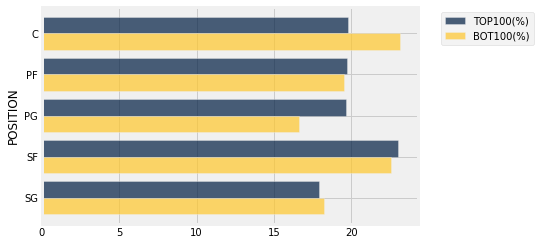

In [ ]:
### 답안을 작성하시오. (그래프 그리기)
topbot.select(0,3,4).barh('POSITION')

### 문제9
Table변수 ``nba``의 ``SALARY`` column에 대해서 histogram을 그리시오. 
- 단, bins를 np.arange(0,25,0.5)로 설정하시오.
- 아래 예시와 동일한 그래프가 되도록 그리시오.


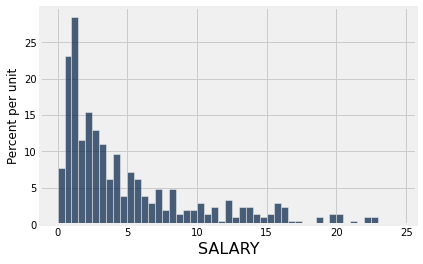

In [ ]:
### 답안을 작성하시오. (그래프 그리기)
nba.hist('SALARY', bins=np.arange(0,25,0.5))

### 문제10
POSITION과 SALARY를 입력받으면 nba Table에서  해당 Position의 Salary 중 몇 등에 해당하는지를 계산하는 함수 ``position_ranking``을 작성하시오. 
- 파라미터 p는 POSITION을 뜻한다.
- 파라미터 s는 SALARY를 뜻한다.
- 등수(ranking)는 1, 2, 3, ... 자연수로 표시된다.


In [ ]:
### 답안을 작성하시오.
def position_ranking(p, s):
    return np.size(nba.where('POSITION', p).sort('SALARY').where('SALARY', are.above(s))['SALARY'])+1

In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
position_ranking('C', 10.312)

18